# Project: Predicting Survival of COVID-19 Patients



# Name: Bhavesh, Karolina
# CUS-620
# Data Mining Project 

##### Dataset credits: Tanmoy Mukherjee https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset?select=covid.csv




#Importing libraries 

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
# if we want to import the dataset directly
#from google.colab import files 
#uploaded = files.upload()

In [3]:
from google.colab import drive #here we mount google drive with this so, we can import file from google drive directly
drive.mount('/content/Mydrive/') 

Mounted at /content/Mydrive/


In [4]:
#uploaded the datset to google drive so, now it works as local pc 
df=pd.read_csv('/content/Mydrive/My Drive/covid.csv') #made pandas dataframe for the dataset
df #print the database with pandas dataframe

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/20,2/5/20,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,6/4/20,1/4/20,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10/4/20,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,13-05-2020,3/5/20,9999-99-99,97,2,58,97,1,2,2,2,2,2,2,2,2,2,2,3,97
566598,047cd1,1,1,7/4/20,6/4/20,9999-99-99,97,2,48,2,2,2,2,2,2,2,2,2,2,2,2,3,97
566599,1beb81,1,2,14-05-2020,1/5/20,9999-99-99,2,1,49,2,2,2,2,2,2,2,2,1,2,2,99,3,2
566600,16fb02,1,1,31-05-2020,29-05-2020,9999-99-99,97,1,43,2,2,2,2,2,2,2,2,2,2,2,2,3,97


In [5]:
df.columns #to know all the columns names

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [6]:
#checking if there is any missing value in the dataset
df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [7]:
#checking head 
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/20,2/5/20,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,6/4/20,1/4/20,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10/4/20,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


# Pre-Processing 

In [8]:
df = df.drop(columns=['id','entry_date','date_symptoms','intubed','pregnancy','icu','contact_other_covid'])

In [9]:
df.columns

Index(['sex', 'patient_type', 'date_died', 'pneumonia', 'age', 'diabetes',
       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'covid_res'],
      dtype='object')

In [10]:
#changing date died values from 9999-99-99 to 0 which mean not died
df["date_died"] = np.where(df["date_died"] == '9999-99-99', 0, df["date_died"])

In [11]:
#changing date died values from given dates to 1 which mean died
df["date_died"] = np.where(df["date_died"] != 0, 1, df["date_died"])

In [12]:
#this dataset is about covid and we trying to figure out which factor can cause this 
#so, add NA to all the values if the number is greater to 2
#Since we only want to see if case is true(1) or false(0)
def preprocess(columnName):
  df.loc[df[columnName] > 2 , columnName] = np.nan
  df.loc[df[columnName] == 2, columnName] = 0

In [13]:
l = ['pneumonia', 'copd','asthma','cardiovascular','tobacco','hypertension','other_disease','obesity', 'renal_chronic','inmsupr','covid_res','diabetes']
for i in l:
  preprocess(i)

In [14]:
df.isnull().sum()

sex                   0
patient_type          0
date_died             0
pneumonia            11
age                   0
diabetes           1981
copd               1749
asthma             1752
inmsupr            1980
hypertension       1824
other_disease      2598
cardiovascular     1822
obesity            1781
renal_chronic      1792
tobacco            1907
covid_res         66910
dtype: int64

#### now we can see there are so many missing values in the data 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sex             566602 non-null  int64  
 1   patient_type    566602 non-null  int64  
 2   date_died       566602 non-null  object 
 3   pneumonia       566591 non-null  float64
 4   age             566602 non-null  int64  
 5   diabetes        564621 non-null  float64
 6   copd            564853 non-null  float64
 7   asthma          564850 non-null  float64
 8   inmsupr         564622 non-null  float64
 9   hypertension    564778 non-null  float64
 10  other_disease   564004 non-null  float64
 11  cardiovascular  564780 non-null  float64
 12  obesity         564821 non-null  float64
 13  renal_chronic   564810 non-null  float64
 14  tobacco         564695 non-null  float64
 15  covid_res       499692 non-null  float64
dtypes: float64(12), int64(3), object(1)
memory usage: 69.2+ 

Removing the missing values 
-----------------------------

In [16]:
# removing the missing values rows and call the dataframe as a new variable 
df = df.dropna()

In [17]:
df.to_csv ('/content/Mydrive/My Drive/new_results.csv', index = False, header=True) # this is make a file in the google drive as name

In [18]:
import numpy as np 
import pandas as pd 
df = pd.read_csv('/content/Mydrive/My Drive/new_results.csv') # reading the new results.csv file from the drive as df

In [19]:
df# here we can see whole cleaned dataset 

,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res
0,2,1,0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,2,0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2,2,0,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,2,1,0.0,60,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496286,2,1,0,1.0,77,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
496287,2,2,0,1.0,63,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
496288,1,1,0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496289,1,1,0,0.0,45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Dataset Attributes Information 
#### sex = Female(1), Male(2)
#### patient_type = Outpatient (1), Inpatient (0)
#### date_died = Died (1), Survived(0)
#### pneumonia = Yes(1), No (0)
#### age = 0 to 120 
#### Diabetes = Yes(1), No (0)
#### copd = Yes(1), No (0)
#### Asthma = Yes(1), No (0)
#### Inmsupr = Yes(1), No (0)
#### hypertension  = Yes(1), No (0)
#### Other_disease = Yes(1), No ()
#### Cardiovascular  = Yes(1), No (0)
#### Obesity = Yes(1), No (0)
#### Renal_chronic = Yes(1), No (0)
#### Tobacco = Yes(1), No (0)
#### Covid_res = Positive(1), Negative (0)

In [20]:
df.columns # all attributes after cleaning the data 

Index(['sex', 'patient_type', 'date_died', 'pneumonia', 'age', 'diabetes',
       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'covid_res'],
      dtype='object')

In [21]:
#checking if there is any missing value in the dataset
df.isnull().sum()

sex               0
patient_type      0
date_died         0
pneumonia         0
age               0
diabetes          0
copd              0
asthma            0
inmsupr           0
hypertension      0
other_disease     0
cardiovascular    0
obesity           0
renal_chronic     0
tobacco           0
covid_res         0
dtype: int64

In [22]:
df.notnull().sum()

sex               496291
patient_type      496291
date_died         496291
pneumonia         496291
age               496291
diabetes          496291
copd              496291
asthma            496291
inmsupr           496291
hypertension      496291
other_disease     496291
cardiovascular    496291
obesity           496291
renal_chronic     496291
tobacco           496291
covid_res         496291
dtype: int64

In [23]:
df.describe() # gives us statistics information about dataset

,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res
count,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000,496291.000000
mean,1.505961,1.213744,0.067648,0.156172,42.512949,0.124693,0.016527,0.032513,0.016097,0.162804,0.030805,0.022777,0.163930,0.020014,0.086036,0.441076
std,0.499965,0.409948,0.251141,0.363019,16.623441,0.330371,0.127489,0.177359,0.125850,0.369187,0.172788,0.149192,0.370212,0.140050,0.280418,0.496516
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.000000,2.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496291 entries, 0 to 496290
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sex             496291 non-null  int64  
 1   patient_type    496291 non-null  int64  
 2   date_died       496291 non-null  int64  
 3   pneumonia       496291 non-null  float64
 4   age             496291 non-null  int64  
 5   diabetes        496291 non-null  float64
 6   copd            496291 non-null  float64
 7   asthma          496291 non-null  float64
 8   inmsupr         496291 non-null  float64
 9   hypertension    496291 non-null  float64
 10  other_disease   496291 non-null  float64
 11  cardiovascular  496291 non-null  float64
 12  obesity         496291 non-null  float64
 13  renal_chronic   496291 non-null  float64
 14  tobacco         496291 non-null  float64
 15  covid_res       496291 non-null  float64
dtypes: float64(12), int64(4)
memory usage: 60.6 MB


In [25]:
#additional column that inditates number of conditions person have
df['ConditionsNum'] = df[['pneumonia', 'diabetes',
       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'obesity', 'renal_chronic']].sum(axis=1)

In [26]:
#we may want to consider droping people with age over 100 or 110 because it seems unrealistic
df = df[df['age'] < 100]

In [27]:
#additional data frames for positive and negative covid cases
covid = df[df['covid_res'] == 1]
noCovid = df[df['covid_res']== 0]

# Visualization Techniques

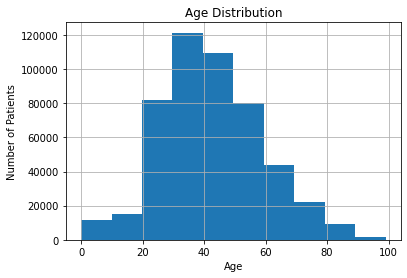

In [28]:
import matplotlib.pyplot as plt
df['age'].hist(bins=10)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

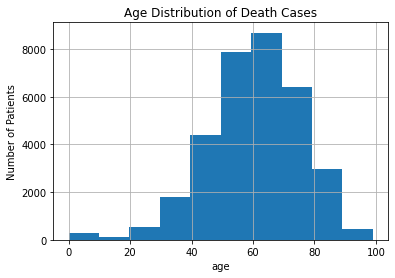

In [29]:
died = df[df['date_died'] == 1]
died['age'].hist(bins=10)

plt.title('Age Distribution of Death Cases')
plt.xlabel('age')
plt.ylabel('Number of Patients')
plt.show()

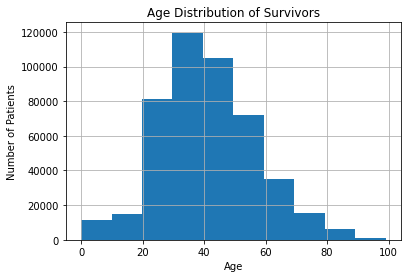

In [30]:
survived = df[df['date_died'] == 0]
survived['age'].hist(bins=10)

plt.title('Age Distribution of Survivors')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

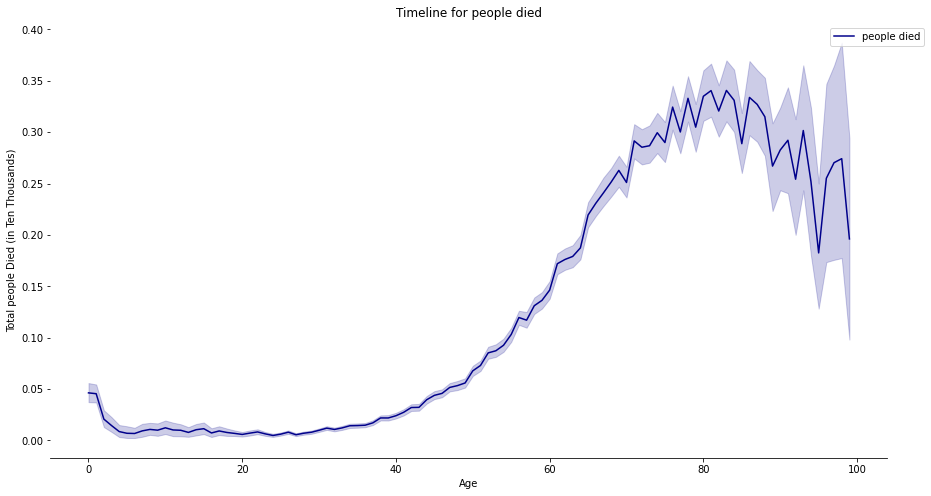

In [31]:
import seaborn as sns
plt.figure(figsize=(15,8))
de = sns.lineplot(x='age', y=df['date_died'] == 1, data=df, color='darkblue', label='people died')
de.set_xlabel('Age')
de.set_ylabel('Total people Died (in Ten Thousands)')
de.set_title ('Timeline for people died')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1))

##### we can observed people between age 80 to 100 died the most.

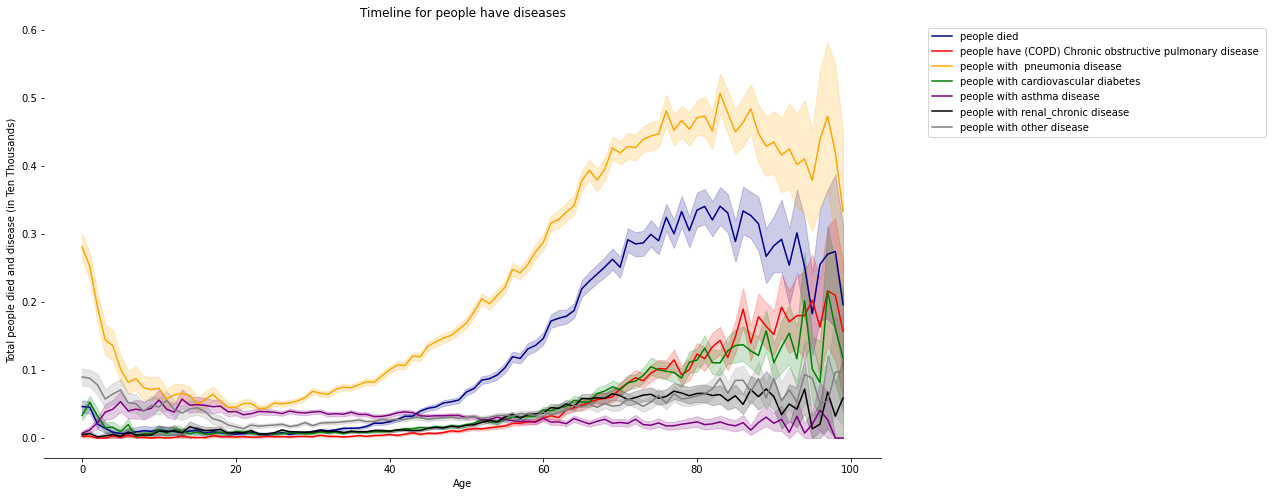

In [32]:
import seaborn as sns
plt.figure(figsize=(15,8))
de = sns.lineplot(x='age', y=df['date_died'] == 1, data=df, color='darkblue', label='people died')
de = sns.lineplot(x='age', y=df['copd'] == 1 , data=df, color='red', label='people have (COPD) Chronic obstructive pulmonary disease ')
de = sns.lineplot(x='age', y=df['pneumonia'] == 1 , data=df, color='orange', label='people with  pneumonia disease')
de = sns.lineplot(x='age', y=df['cardiovascular'] == 1 , data=df, color='green', label='people with cardiovascular diabetes')
de = sns.lineplot(x='age', y=df['asthma'] == 1 , data=df, color='purple', label='people with asthma disease')
de = sns.lineplot(x='age', y=df['renal_chronic'] == 1 , data=df, color='black', label='people with renal_chronic disease')
de = sns.lineplot(x='age', y=df['other_disease'] == 1 , data=df, color='grey', label='people with other disease')

de.set_xlabel('Age')
de.set_ylabel('Total people died and disease (in Ten Thousands)')
de.set_title ('Timeline for people have diseases')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1))

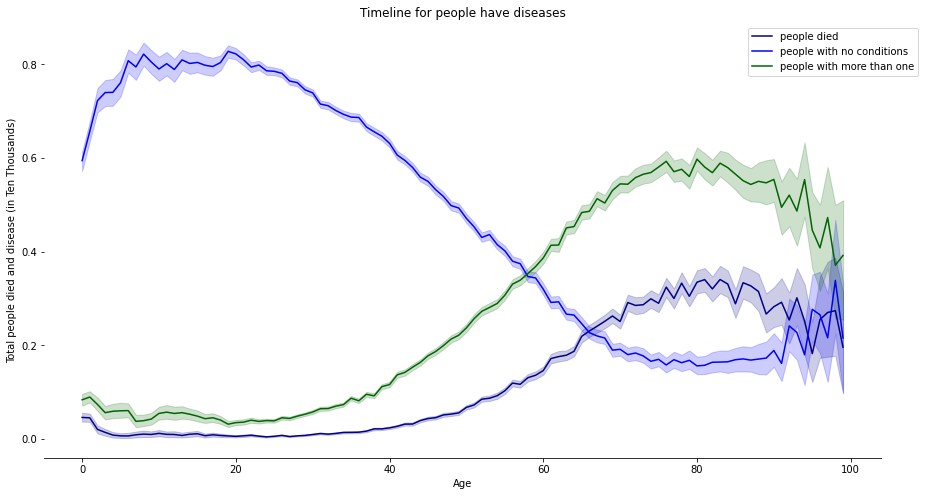

In [33]:
import seaborn as sns
plt.figure(figsize=(15,8))
de = sns.lineplot(x='age', y=df['date_died'] == 1, data=df, color='darkblue', label='people died')
de = sns.lineplot(x='age', y=df['ConditionsNum'] == 0 , data=df, color='blue', label='people with no conditions')
de = sns.lineplot(x='age', y=df['ConditionsNum'] > 1 , data=df, color='darkgreen', label='people with more than one')

de.set_xlabel('Age')
de.set_ylabel('Total people died and disease (in Ten Thousands)')
de.set_title ('Timeline for people have diseases')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1))

###### By observing these line graphs it looks like people who died most have pneumonia disease. we can study which disease was spread most among people who died but with this graph help it looks like pneumonia disease is higher than other types of disease and the died rate. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender distribution for whole dataset')

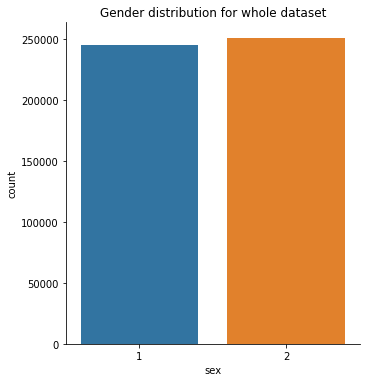

In [34]:
#1- female, 2-male
sns.catplot('sex',data=df,kind='count')
plt.title('Gender distribution for whole dataset')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'People died on Gender basis')

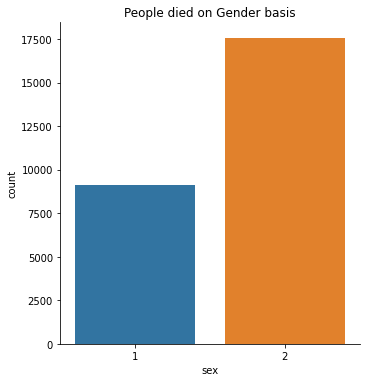

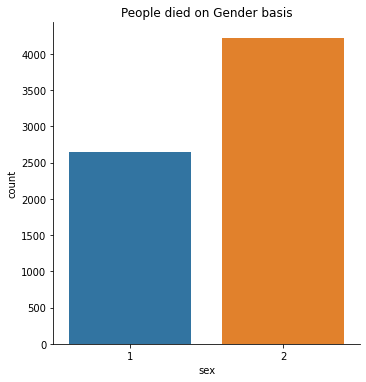

In [35]:
#1- female, 2-male
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot('sex',data=covid[covid['date_died'] == 1],kind='count')
plt.title('People died on Gender basis')

sns.catplot('sex',data=noCovid[noCovid['date_died'] == 1],kind='count')
plt.title('People died on Gender basis')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' Patient Type Distribution')

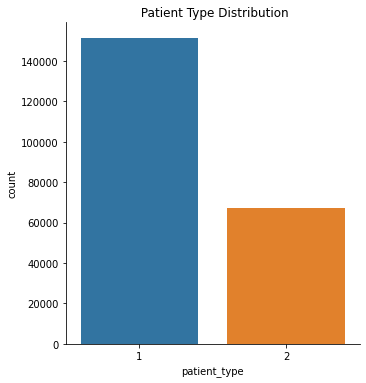

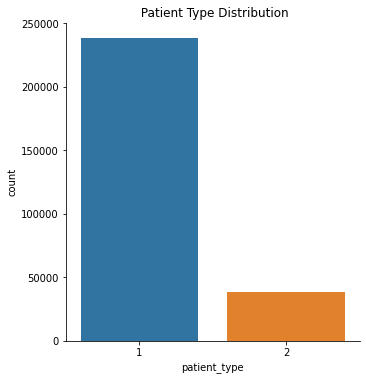

In [36]:
sns.catplot('patient_type',data=covid,kind='count')
plt.title(' Patient Type Distribution')

sns.catplot('patient_type',data=noCovid,kind='count')
plt.title(' Patient Type Distribution')

#### Here we can see more patients were the incoming patients (1) then outgoing patients. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Died Patient Type Distribution')

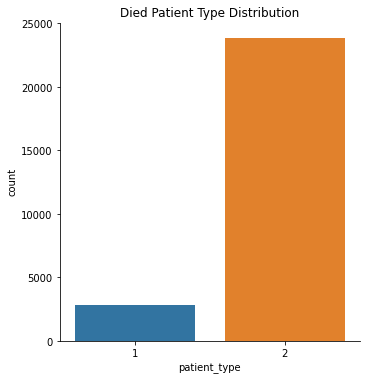

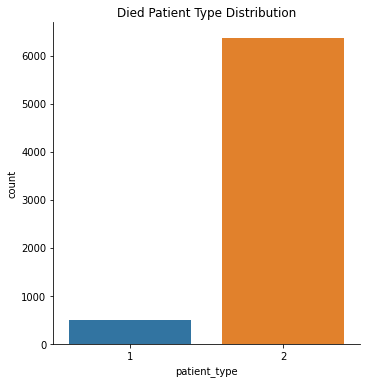

In [37]:
sns.catplot('patient_type',data=covid[covid['date_died'] == 1],kind='count')
plt.title('Died Patient Type Distribution')

sns.catplot('patient_type',data=noCovid[noCovid['date_died'] == 1],kind='count')
plt.title('Died Patient Type Distribution')

# Data Mining (machine learning) Techniques 

### Classification Models

------------------------------
Training and Testing dataset 
------------------------------

Dividing a dataset into 60% training and 40% testing

In [38]:
from sklearn.model_selection import train_test_split
x = df.drop(['date_died'], axis=1)
y = df['date_died']
y = y.astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6,test_size=0.4)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(297709, 16)
(198473, 16)
(297709,)
(198473,)


-------------------------
Decision tree classifier
-------------------------

Work in Progress

In [40]:
from sklearn import tree
from sklearn import metrics
myTree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
myTree = myTree.fit(x_train, y_train)

predictions = myTree.predict(x_test)

from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predictions)))

print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

Accuracy on test data is 0.94
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    185156
           1       0.55      0.25      0.34     13317

    accuracy                           0.94    198473
   macro avg       0.75      0.62      0.65    198473
weighted avg       0.92      0.94      0.92    198473

[[182455   2701]
 [ 10031   3286]]


[Text(1395.0, 996.6, 'patient_type <= 1.5\nentropy = 0.358\nsamples = 297709\nvalue = [277468, 20241]\nclass = 0'),
 Text(697.5, 815.4000000000001, 'pneumonia <= 0.5\nentropy = 0.07\nsamples = 234102\nvalue = [232123, 1979]\nclass = 0'),
 Text(348.75, 634.2, 'age <= 55.5\nentropy = 0.038\nsamples = 226511\nvalue = [225601, 910]\nclass = 0'),
 Text(174.375, 453.0, 'covid_res <= 0.5\nentropy = 0.018\nsamples = 196438\nvalue = [196107, 331]\nclass = 0'),
 Text(87.1875, 271.79999999999995, 'diabetes <= 0.5\nentropy = 0.007\nsamples = 123243\nvalue = [123173, 70]\nclass = 0'),
 Text(43.59375, 90.59999999999991, 'entropy = 0.005\nsamples = 117954\nvalue = [117905, 49]\nclass = 0'),
 Text(130.78125, 90.59999999999991, 'entropy = 0.037\nsamples = 5289\nvalue = [5268, 21]\nclass = 0'),
 Text(261.5625, 271.79999999999995, 'age <= 42.5\nentropy = 0.034\nsamples = 73195\nvalue = [72934, 261]\nclass = 0'),
 Text(217.96875, 90.59999999999991, 'entropy = 0.017\nsamples = 49579\nvalue = [49501, 78]\nc

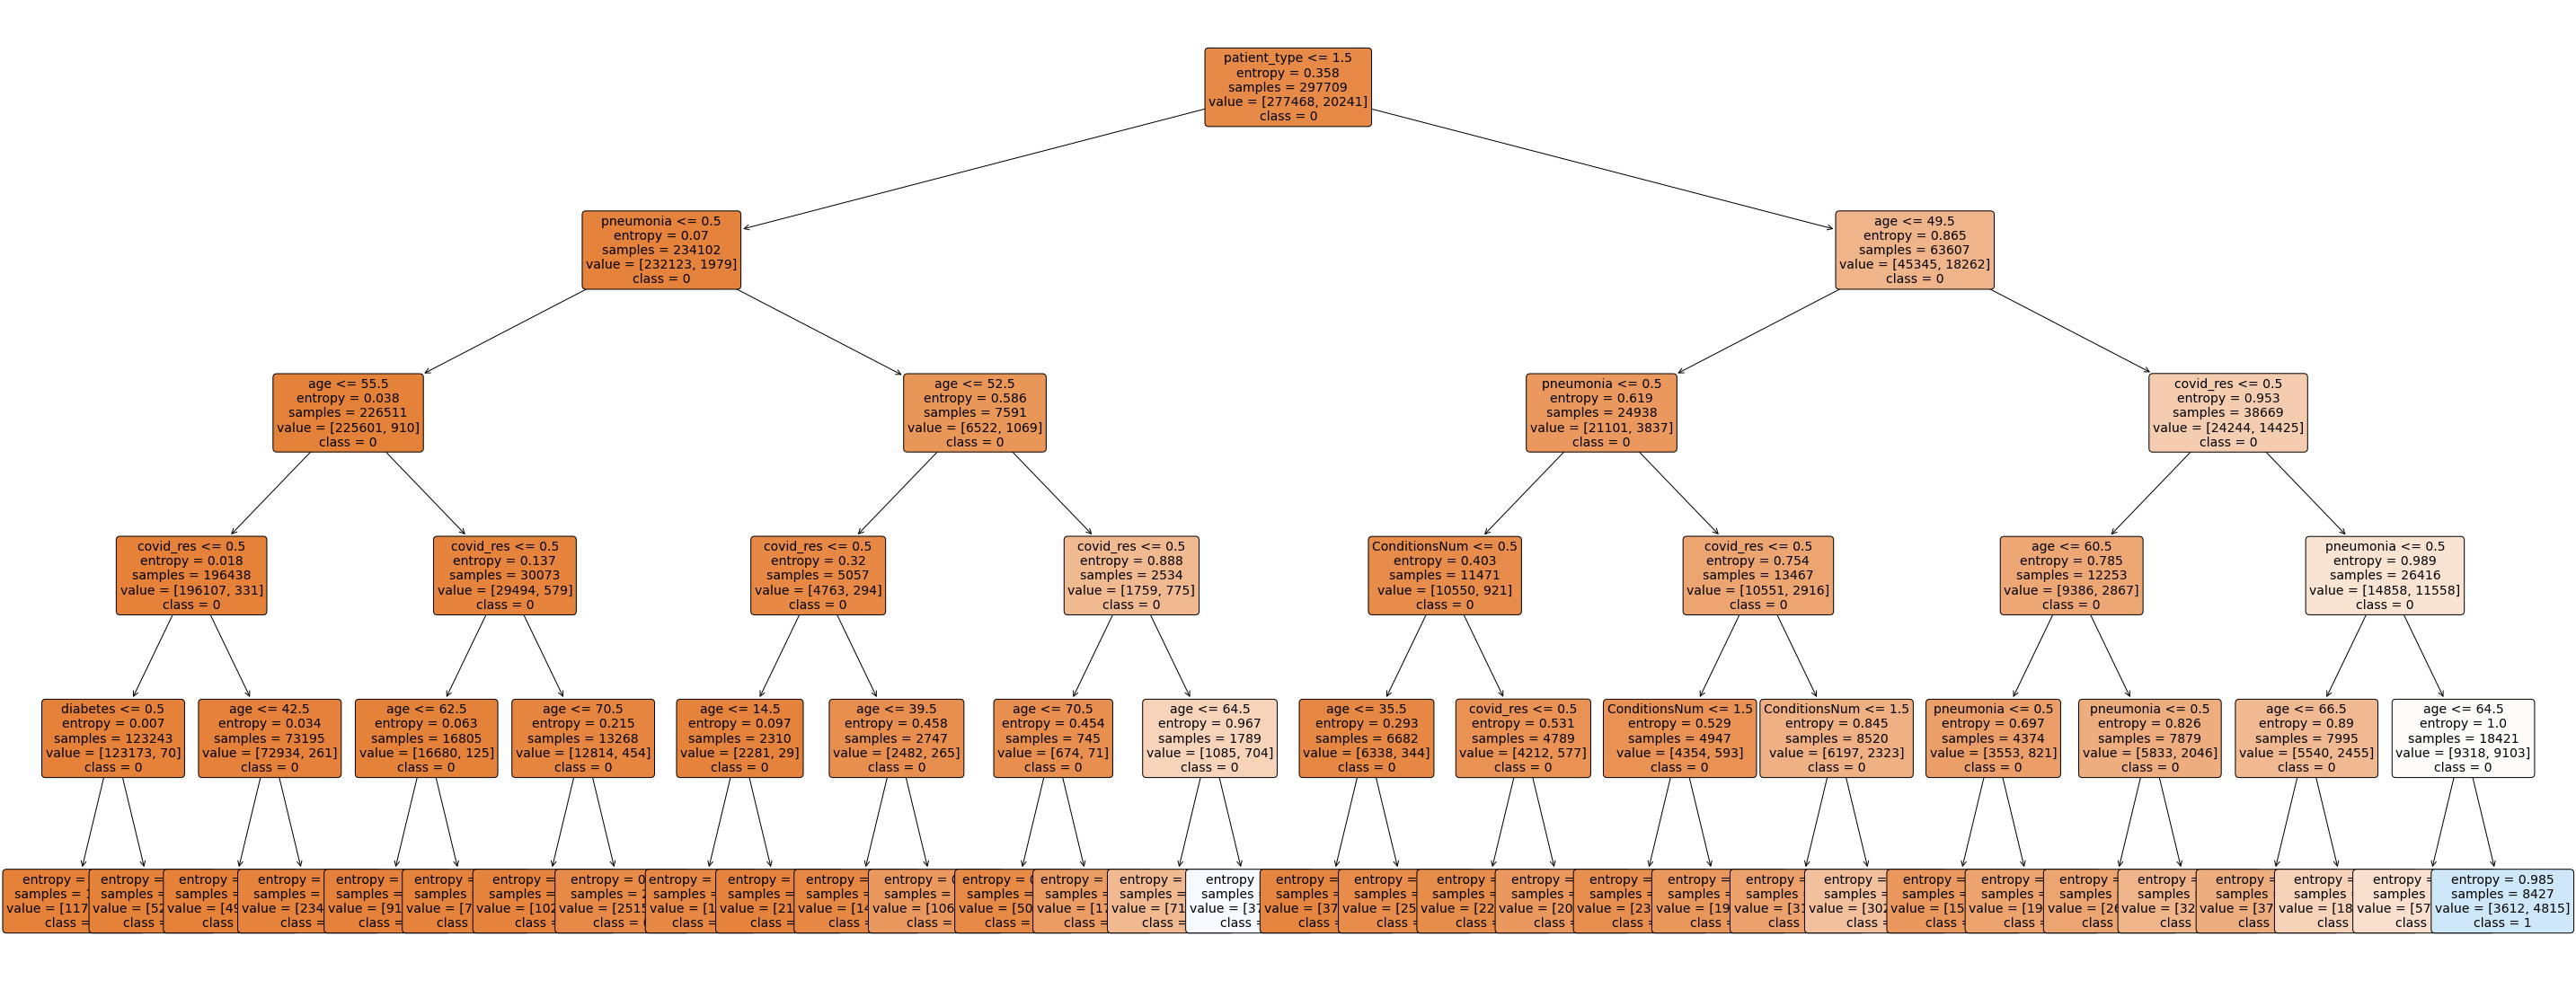

In [41]:
labels = ['0','1']
plt.figure(figsize=(50,20))
tree.plot_tree(myTree,
              feature_names = x_train.columns,
              class_names = labels,
              filled=True, 
              rounded=True, 
              fontsize=14)

In [42]:
from sklearn import tree
myTree = tree.DecisionTreeClassifier(criterion='gini',max_depth=5)  #gini is another criterion we can use
myTree = myTree.fit(x_train, y_train)

predictions = myTree.predict(x_test)

from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predictions)))

print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

Accuracy on test data is 0.94
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    185156
           1       0.55      0.25      0.34     13317

    accuracy                           0.94    198473
   macro avg       0.75      0.62      0.65    198473
weighted avg       0.92      0.94      0.92    198473

[[182455   2701]
 [ 10031   3286]]


Nice!! we got 94% accuracy 

---------------------------
Random Forest Classifier
---------------------------

In [43]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=5)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.9281161669345452
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    185156
           1       0.44      0.29      0.35     13317

    accuracy                           0.93    198473
   macro avg       0.70      0.63      0.66    198473
weighted avg       0.92      0.93      0.92    198473

[[180394   4762]
 [  9505   3812]]


-----------------------------------
Naive Bayes Classifier
-----------------------------------

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [45]:
model = GaussianNB()
model.fit(x_train, y_train)
print(model)

expected = y_test
predicted = model.predict(x_test)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.98      0.89      0.93    185156
           1       0.31      0.70      0.43     13317

    accuracy                           0.88    198473
   macro avg       0.64      0.79      0.68    198473
weighted avg       0.93      0.88      0.90    198473

[[164424  20732]
 [  4031   9286]]


To address the class imbalance problem we used undersampling technique before running the classifiers
------------------------------------

In [46]:
print(len(df[df['date_died']==1]))
print(len(df[df['date_died']==0]))


33558
462624


In [47]:
from sklearn.model_selection import train_test_split
#fixing class imbalance problem
died_no = df[df.date_died == 0].index
died_yes = df[df.date_died == 1].index

#the number indicates the number of samples in class date_died = 0, we can adjust that number
random_index = np.random.choice(died_no, 50000, replace = False)
under_sample_died_no = np.concatenate([died_yes, random_index])

under_sample = df.loc[under_sample_died_no]
under_sample.shape

#creating new training and testing sets
x = under_sample.drop(['date_died'], axis=1)
y = under_sample['date_died']
y = y.astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6,test_size=0.4)

In [48]:
#naive bayes
model = GaussianNB()
model.fit(x_train, y_train)
print(model)

expected = y_test
predicted = model.predict(x_test)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     20087
           1       0.80      0.82      0.81     13337

    accuracy                           0.85     33424
   macro avg       0.84      0.84      0.84     33424
weighted avg       0.85      0.85      0.85     33424

[[17298  2789]
 [ 2352 10985]]


In [49]:
#decision tree
from sklearn import tree
myTree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=6)
myTree = myTree.fit(x_train, y_train)

predictions = myTree.predict(x_test)

from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predictions)))

print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

Accuracy on test data is 0.89
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     20087
           1       0.82      0.92      0.87     13337

    accuracy                           0.89     33424
   macro avg       0.88      0.89      0.88     33424
weighted avg       0.89      0.89      0.89     33424

[[17338  2749]
 [ 1043 12294]]


[Text(2511.0, 1009.5428571428572, 'patient_type <= 1.5\nentropy = 0.973\nsamples = 50134\nvalue = [29913, 20221]\nclass = 0'),
 Text(1255.5, 854.2285714285715, 'pneumonia <= 0.5\nentropy = 0.38\nsamples = 27012\nvalue = [25017, 1995]\nclass = 0'),
 Text(627.75, 698.9142857142858, 'age <= 55.5\nentropy = 0.232\nsamples = 25251\nvalue = [24298, 953]\nclass = 0'),
 Text(313.875, 543.6, 'covid_res <= 0.5\nentropy = 0.113\nsamples = 21428\nvalue = [21103, 325]\nclass = 0'),
 Text(156.9375, 388.28571428571433, 'ConditionsNum <= 2.5\nentropy = 0.044\nsamples = 13415\nvalue = [13350, 65]\nclass = 0'),
 Text(78.46875, 232.97142857142865, 'age <= 3.5\nentropy = 0.038\nsamples = 13233\nvalue = [13179, 54]\nclass = 0'),
 Text(39.234375, 77.65714285714284, 'entropy = 0.226\nsamples = 164\nvalue = [158, 6]\nclass = 0'),
 Text(117.703125, 77.65714285714284, 'entropy = 0.035\nsamples = 13069\nvalue = [13021, 48]\nclass = 0'),
 Text(235.40625, 232.97142857142865, 'obesity <= 0.5\nentropy = 0.329\nsampl

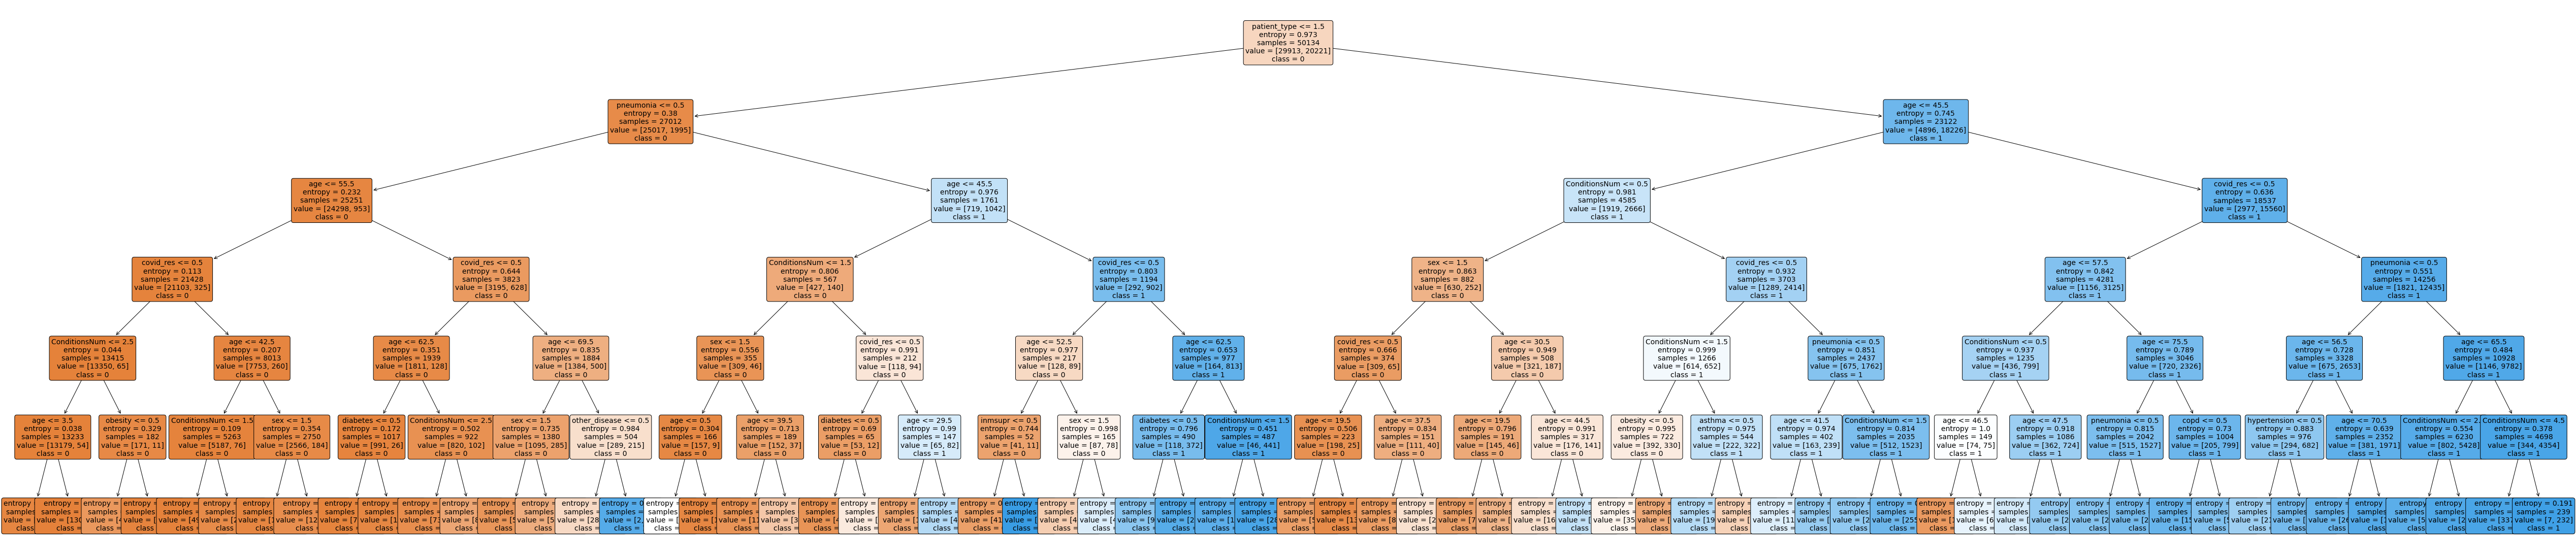

In [50]:
import matplotlib.pyplot as plt
labels = ['0','1']
plt.figure(figsize=(90,20))
tree.plot_tree(myTree,
              feature_names = x_train.columns,
              class_names = labels,
              filled=True, 
              rounded=True, 
              fontsize=14)

In [51]:
myTree = tree.DecisionTreeClassifier(criterion='gini',max_depth=5)  
myTree = myTree.fit(x_train, y_train)

predictions = myTree.predict(x_test)

from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predictions)))

print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

Accuracy on test data is 0.89
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     20087
           1       0.82      0.92      0.87     13337

    accuracy                           0.89     33424
   macro avg       0.88      0.89      0.88     33424
weighted avg       0.89      0.89      0.89     33424

[[17340  2747]
 [ 1057 12280]]


[Text(1953.0, 996.6, 'patient_type <= 1.5\ngini = 0.481\nsamples = 50134\nvalue = [29913, 20221]\nclass = 0'),
 Text(976.5, 815.4000000000001, 'pneumonia <= 0.5\ngini = 0.137\nsamples = 27012\nvalue = [25017, 1995]\nclass = 0'),
 Text(488.25, 634.2, 'age <= 60.5\ngini = 0.073\nsamples = 25251\nvalue = [24298, 953]\nclass = 0'),
 Text(244.125, 453.0, 'age <= 50.5\ngini = 0.039\nsamples = 22957\nvalue = [22495, 462]\nclass = 0'),
 Text(122.0625, 271.79999999999995, 'ConditionsNum <= 1.5\ngini = 0.023\nsamples = 19317\nvalue = [19096, 221]\nclass = 0'),
 Text(61.03125, 90.59999999999991, 'gini = 0.017\nsamples = 18228\nvalue = [18070, 158]\nclass = 0'),
 Text(183.09375, 90.59999999999991, 'gini = 0.109\nsamples = 1089\nvalue = [1026, 63]\nclass = 0'),
 Text(366.1875, 271.79999999999995, 'covid_res <= 0.5\ngini = 0.124\nsamples = 3640\nvalue = [3399, 241]\nclass = 0'),
 Text(305.15625, 90.59999999999991, 'gini = 0.037\nsamples = 1996\nvalue = [1958, 38]\nclass = 0'),
 Text(427.21875, 90.59

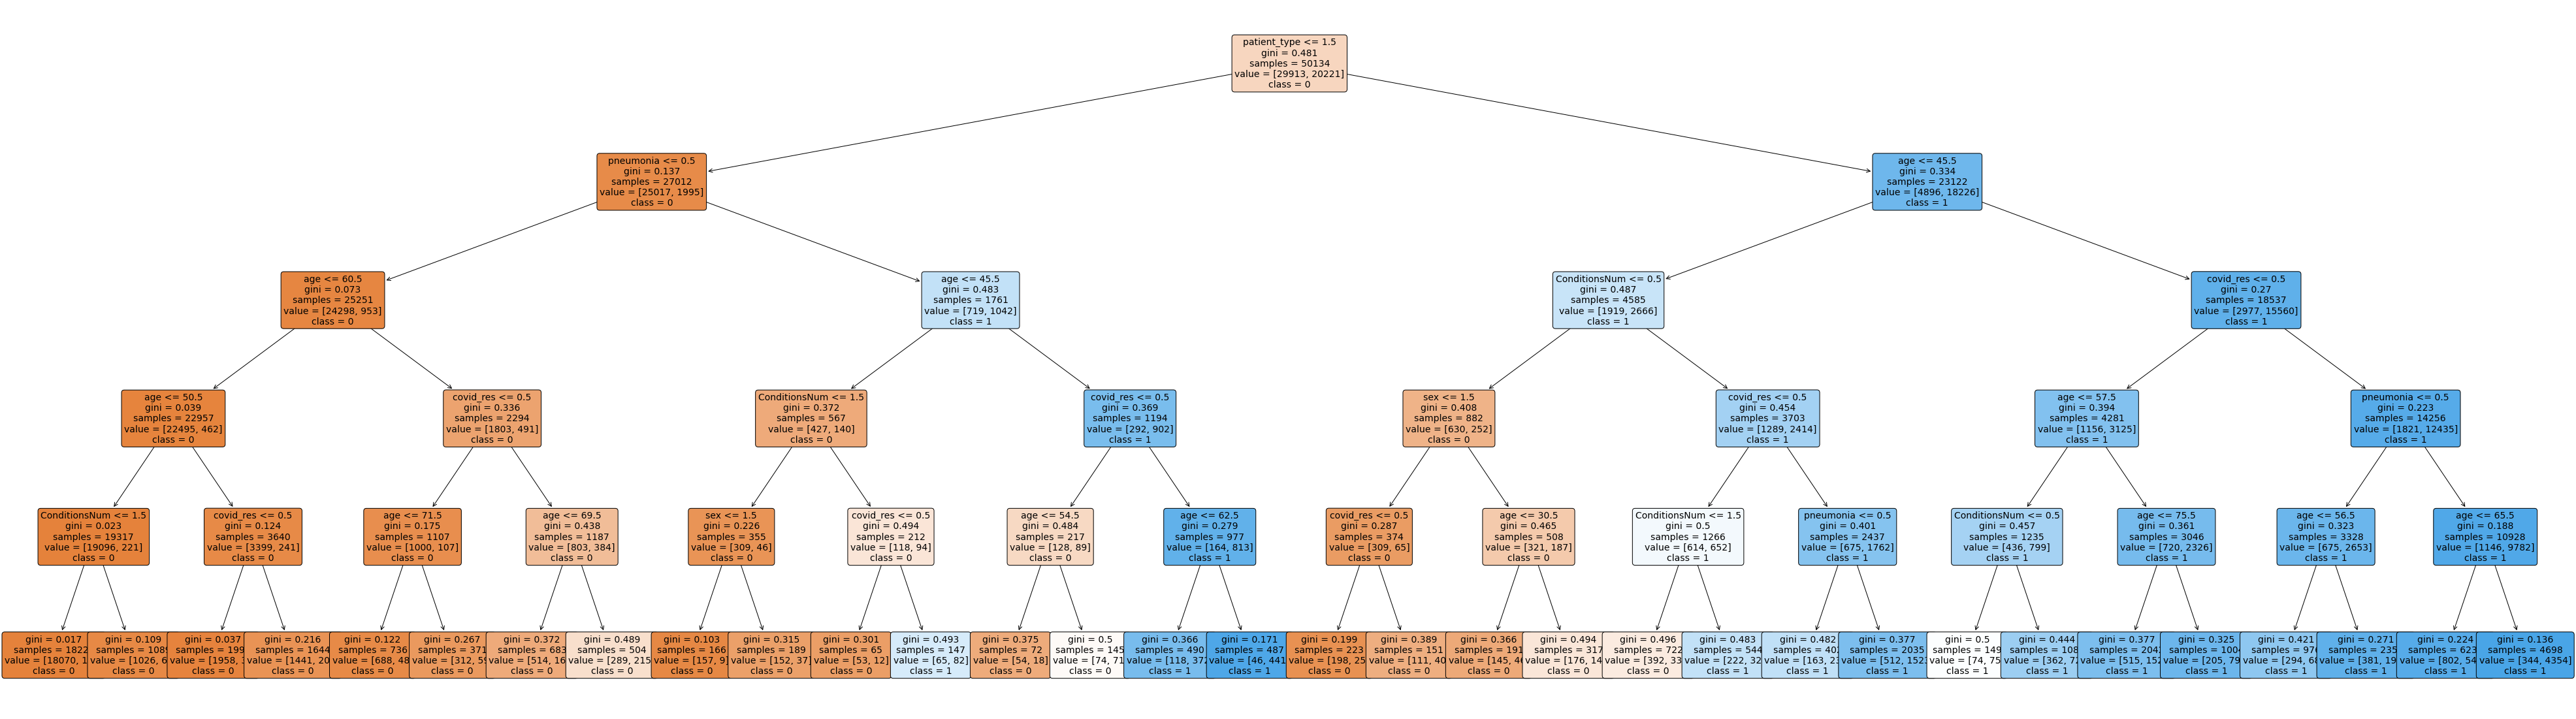

In [52]:
labels = ['0','1']
plt.figure(figsize=(70,20))
tree.plot_tree(myTree,
              feature_names = x_train.columns,
              class_names = labels,
              filled=True, 
              rounded=True, 
              fontsize=14)

In [53]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=5)

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
expected = y_test
predicted = model.predict(x_test)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

Accuracy: 0.86249401627573
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     20087
           1       0.80      0.82      0.81     13337

    accuracy                           0.85     33424
   macro avg       0.84      0.84      0.84     33424
weighted avg       0.85      0.85      0.85     33424

[[17298  2789]
 [ 2352 10985]]


When running on dataset without class imbalance problem precision and recall increase significantly. 


# Work in progress


In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [55]:
###resource: https://scikit-learn.org/stable/modules/cross_validation.html
### https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/
#we can test cross validation on different classifiers but it doesn't seem to increase performance

model = GaussianNB()
x = under_sample.drop(['date_died'], axis=1)
y = under_sample['date_died']
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, x, y, cv = cv, n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.84 (+/- 0.01)


In [56]:
died = df[df['date_died'] == 1]

### Bins for age

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


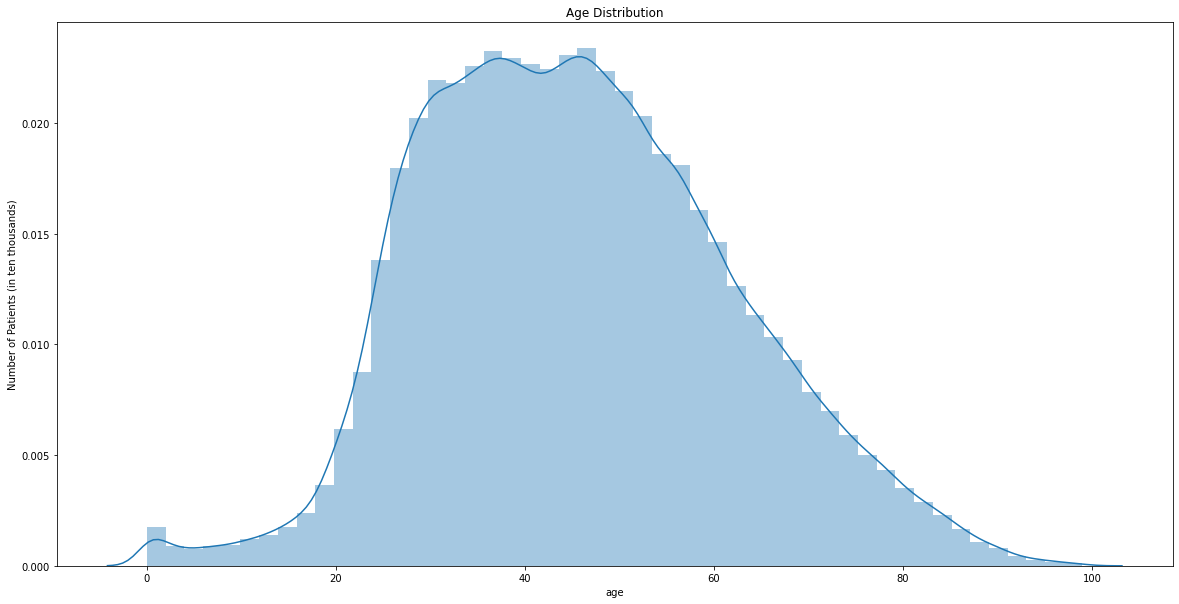

In [57]:
def assign_bin_to_age(row):
    age = row
    if age <= 2:
        return "2 and Under"
    elif age >= 3 and age <= 12:
        return "3 to 12"
    elif age >= 13 and age <= 17:
        return "13 to 17"
    elif age >= 18 and age <= 25:
        return "18 to 25"
    elif age >= 26 and age <= 34:
        return "26 to 34"
    elif age >= 35 and age <= 54:
        return "35 to 54"
    elif age >= 55 and age <= 64:
        return "55 to 64"
    elif age >= 65 and age <= 74:
        return "65 to 74"
    elif age >= 75 and age <= 84:
        return "75 to 84"
    elif age >= 85:
        return "85+"
        
import matplotlib.pyplot as plt
import seaborn as sns
df['age_bin'] = df.age.apply(lambda row: assign_bin_to_age(row))
df_covid = df[df.covid_res == 1]
plt.figure(figsize=(20,10))
sns.distplot(df_covid.age)
plt.title('Age Distribution')
plt.ylabel('Number of Patients (in ten thousands)')
plt.show()

#### with the help of this graph we can easily tell that between age 30 to 50 most of the people got positive from the covid 19. 

Performing simple statistics to see how the data is distributed.

In [58]:
def numConditions(columnName, df):
  data = df[df[columnName] == 1]
  print('{:24}{}'.format(columnName, len(data)))

In [59]:
print(len(covid[covid['ConditionsNum'] == 0]))
print(len(covid[covid['ConditionsNum'] != 0]))

print(len(noCovid[noCovid['ConditionsNum'] == 0]))
print(len(noCovid[noCovid['ConditionsNum'] != 0]))

103986
114878
175254
102064


In [60]:
#people with covid positive
l = ['pneumonia', 'copd','asthma','cardiovascular','tobacco','hypertension','other_disease','obesity', 'renal_chronic','diabetes']
for i in l:
  numConditions(i, covid)

pneumonia               52238
copd                    3839
asthma                  6030
cardiovascular          5105
tobacco                 16994
hypertension            43976
other_disease           6233
obesity                 42909
renal_chronic           4749
diabetes                35897


In [61]:
#people with covid negative
l = ['pneumonia', 'copd','asthma','cardiovascular','tobacco','hypertension','other_disease','obesity', 'renal_chronic','diabetes']
for i in l:
  numConditions(i,noCovid)

pneumonia               25234
copd                    4351
asthma                  10104
cardiovascular          6194
tobacco                 25699
hypertension            36798
other_disease           9051
obesity                 38442
renal_chronic           5178
diabetes                25975


In [62]:
died = len(df[df['date_died'] == 1 ])
population = len(df['date_died'])
mortality = round((died/population)*100,2)
print('Mortality rate:', mortality)

Mortality rate: 6.76


In [63]:
died = len(covid[covid['date_died'] == 1 ])
population = len(covid['date_died'])
mortality = round((died/population)*100,2)
print('Mortality rate COVID:', mortality)

Mortality rate COVID: 12.19


In [64]:
died = len(noCovid[noCovid['date_died'] == 1 ])
population = len(noCovid['date_died'])
mortality = round((died/population)*100,2)
print('Mortality rate no COVID:', mortality)

Mortality rate no COVID: 2.48


In [65]:
data = covid[covid['ConditionsNum'] == 0]
p = data.groupby(data['date_died'])['date_died'].count()
t = p.sum()
d = p[1]
perc = (d/t)*100
print('%.2f percent of people without pre-existing conditions and COVID positive died' % (perc))

data = noCovid[noCovid['ConditionsNum'] == 0]
p = data.groupby(data['date_died'])['date_died'].count()
t = p.sum()
d = p[1]
perc = (d/t)*100
print('%.2f percent of people without pre-existing conditions and COVID negative died' % (perc))

data = covid[covid['ConditionsNum'] > 1]
p = data.groupby(data['date_died'])['date_died'].count()
t = p.sum()
d = p[1]
perc = (d/t)*100
print('%.2f percent of people with with more than one pre-existing condition and COVID positive died ' % (perc))

data = noCovid[noCovid['ConditionsNum'] > 1]
p = data.groupby(data['date_died'])['date_died'].count()
t = p.sum()
d = p[1]
perc = (d/t)*100
print('%.2f percent of people with more than one pre-existing condition and COVID negative died' % (perc))

1.82 percent of people without pre-existing conditions and COVID positive died
0.38 percent of people without pre-existing conditions and COVID negative died
30.73 percent of people with with more than one pre-existing condition and COVID positive died 
10.58 percent of people with more than one pre-existing condition and COVID negative died


In [66]:
def percent(columnName,df):
  data = df[df[columnName] == 1]
  p = data.groupby(data['date_died'])['date_died'].count()
  t = p.sum()
  d = p[1]
  perc = (d/t)*100
  print('%.2f percent of people with %s died' % (perc, columnName))

In [67]:
l = ['pneumonia', 'copd','asthma','cardiovascular','tobacco','hypertension','other_disease','obesity', 'renal_chronic','diabetes']
for i in l:
  percent(i,covid)

38.97 percent of people with pneumonia died
34.41 percent of people with copd died
9.12 percent of people with asthma died
27.78 percent of people with cardiovascular died
13.74 percent of people with tobacco died
25.69 percent of people with hypertension died
21.90 percent of people with other_disease died
15.63 percent of people with obesity died
37.97 percent of people with renal_chronic died
27.54 percent of people with diabetes died


In [68]:
#people that did not have covid 
l = ['pneumonia', 'copd','asthma','cardiovascular','tobacco','hypertension','other_disease','obesity', 'renal_chronic','diabetes']
for i in l:
  percent(i,noCovid)

17.01 percent of people with pneumonia died
13.86 percent of people with copd died
1.44 percent of people with asthma died
10.48 percent of people with cardiovascular died
3.07 percent of people with tobacco died
7.82 percent of people with hypertension died
8.52 percent of people with other_disease died
3.17 percent of people with obesity died
15.91 percent of people with renal_chronic died
9.68 percent of people with diabetes died


Apriori Preprocessing
---------------------

In [69]:
dfAp = df[df['covid_res'] == 1]

In [70]:
died_no = dfAp[dfAp.date_died == 0].index
died_yes = dfAp[dfAp.date_died == 1].index

#the number indicates the number of samples in class date_died = 0, we can adjust that number
random_index = np.random.choice(died_no, 45000, replace = False)
under_sample_died_no = np.concatenate([died_yes, random_index])

dfAp = dfAp.loc[under_sample_died_no]

In [71]:
dfAp['age'] = pd.cut(dfAp['age'], bins=20)

In [72]:
#numeric values to nominal
dfAp.loc[dfAp['sex'] == 1, 'sex'] = 'female'
dfAp.loc[dfAp['sex'] == 2, 'sex'] = 'male'
dfAp.loc[dfAp['patient_type'] == 1, 'patient_type'] = 'outpatient'
dfAp.loc[dfAp['patient_type'] == 2, 'patient_type'] = 'inpatient'
dfAp.loc[dfAp['date_died'] == 1, 'date_died'] = 'yes'
dfAp.loc[dfAp['date_died'] == 0, 'date_died'] = 'no'

In [73]:
#function takes dataset name anad column name and changes values to the column name if 1 and to blank if 0
def aprioriPreprocess(columnName,dataset):
  dataset.loc[dataset[columnName]== 1, columnName] = columnName
  dataset.loc[dataset[columnName]== 0, columnName] = ''

In [74]:
#run function of a set of columns that apply to this rule
l = ['pneumonia', 'copd','asthma','cardiovascular','tobacco','hypertension','other_disease','obesity', 'renal_chronic','diabetes','covid_res','inmsupr']
for i in l:
  aprioriPreprocess(i, dfAp)

In [75]:
dfAp['ConditionsNum'] = dfAp['ConditionsNum'].astype(float)

In [76]:
dfAp.loc[dfAp['ConditionsNum'] > 1, 'ConditionsNum'] = 'More than one'

In [77]:
dfAp.loc[dfAp['ConditionsNum'] == 0, 'ConditionsNum'] = 'None'

In [78]:
dfAp.loc[dfAp['ConditionsNum'] == 1, 'ConditionsNum'] = 'One'


In [79]:
dfAp

,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,ConditionsNum,age_bin
4,female,inpatient,yes,,"(59.4, 64.35]",diabetes,,,,hypertension,,cardiovascular,,,,covid_res,More than one,55 to 64
5,male,inpatient,yes,pneumonia,"(44.55, 49.5]",diabetes,,,,,,,,,,covid_res,More than one,35 to 54
24,female,outpatient,yes,,"(59.4, 64.35]",,,,,hypertension,,,,,,covid_res,One,55 to 64
36,male,inpatient,yes,pneumonia,"(74.25, 79.2]",,,,,hypertension,,,,,,covid_res,More than one,75 to 84
41,female,inpatient,yes,pneumonia,"(49.5, 54.45]",diabetes,,,,,,,obesity,,,covid_res,More than one,35 to 54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16713,male,outpatient,no,,"(49.5, 54.45]",diabetes,,,,,,,,,,covid_res,One,35 to 54
172528,female,outpatient,no,,"(29.7, 34.65]",,,,,,,,,,,covid_res,None,26 to 34
189055,female,outpatient,no,,"(19.8, 24.75]",,,,,,,,,,,covid_res,None,18 to 25
155968,male,inpatient,no,pneumonia,"(54.45, 59.4]",,,,,,,,,,,covid_res,One,55 to 64


In [80]:
#temp solution
dfAp = dfAp.drop(columns='age')

In [81]:
dfAp = dfAp.drop(columns='covid_res')

In [82]:
%pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=ebeb6dd6419ab5e9caa3f73ecd2550d2c12c59850ab5458b46d28ae75c269d66
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [83]:
#change dataframe to a list of lists
dataList = dfAp.values.tolist()

In [84]:
# drop missing values for the list of lists
N = ''
res = [[ele for ele in sub if ele != N] for sub in dataList]

In [85]:
from apyori import apriori
association_rules = apriori(res, min_support = 0.2, min_confidence = 0.7, min_lift = 1.0)

association_results = list(association_rules)
association_results

[RelationRecord(items=frozenset({'35 to 54', 'no'}), support=0.29142139768447484, ordered_statistics=[OrderedStatistic(items_base=frozenset({'35 to 54'}), items_add=frozenset({'no'}), confidence=0.7364117025026437, lift=1.1731856656092117)]),
 RelationRecord(items=frozenset({'hypertension', 'More than one'}), support=0.227381782675408, ordered_statistics=[OrderedStatistic(items_base=frozenset({'hypertension'}), items_add=frozenset({'More than one'}), confidence=0.8583539571375916, lift=2.3676566058943416)]),
 RelationRecord(items=frozenset({'More than one', 'inpatient'}), support=0.28210350118566047, ordered_statistics=[OrderedStatistic(items_base=frozenset({'More than one'}), items_add=frozenset({'inpatient'}), confidence=0.7781454405540592, lift=1.6347325020753263)]),
 RelationRecord(items=frozenset({'More than one', 'pneumonia'}), support=0.26285395452643323, ordered_statistics=[OrderedStatistic(items_base=frozenset({'More than one'}), items_add=frozenset({'pneumonia'}), confidence=

In [86]:
#resource: https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: 35 to 54 -> no
Support: 0.29142139768447484
Confidence: 0.7364117025026437
Lift: 1.1731856656092117
Rule: hypertension -> More than one
Support: 0.227381782675408
Confidence: 0.8583539571375916
Lift: 2.3676566058943416
Rule: More than one -> inpatient
Support: 0.28210350118566047
Confidence: 0.7781454405540592
Lift: 1.6347325020753263
Rule: More than one -> pneumonia
Support: 0.26285395452643323
Confidence: 0.7250480954213159
Lift: 1.8655766980386956
Rule: no -> None
Support: 0.33163621146603434
Confidence: 0.9262505843852268
Lift: 1.4756200976572647
Rule: None -> outpatient
Support: 0.31067094434370207
Confidence: 0.8676951846657317
Lift: 1.6559315263858991
Rule: inpatient -> pneumonia
Support: 0.3478727856046869
Confidence: 0.7308131868131869
Lift: 1.8804105004176788
Rule: inpatient -> yes
Support: 0.3331566466731762
Confidence: 0.8948669913825403
Lift: 1.8799418201381486
Rule: no -> outpatient
Support: 0.4848514437159994
Confidence: 0.7724222222222221
Lift: 1.4741101853084282


In [87]:
dfAp.to_csv ('/content/Mydrive/My Drive/AprioriSet.csv', index = False, header=True) 

# K-means

In [88]:
df

,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,ConditionsNum,age_bin
0,2,1,0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26 to 34
1,2,1,0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18 to 25
2,1,2,0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,35 to 54
3,2,2,0,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,26 to 34
4,1,2,1,0.0,60,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,55 to 64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496286,2,1,0,1.0,77,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,75 to 84
496287,2,2,0,1.0,63,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,55 to 64
496288,1,1,0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18 to 25
496289,1,1,0,0.0,45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35 to 54


In [89]:
from sklearn.cluster import KMeans
x = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].values

##### kmeans elbow graph 

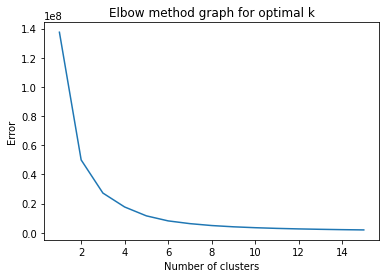

In [90]:
Error =[]
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 16), Error)
plt.title('Elbow method graph for optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

### by doing the trade off we take the elbow so, we notice in the elbow graph we can take 3 clusters and that will be better choice

In [91]:
kmeans = KMeans(n_clusters = 3)
kmeans = kmeans.fit(x)
kmeans.labels_
predictions = kmeans.predict(x)

In [92]:
df['labels'] = kmeans.labels_
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,ConditionsNum,age_bin,labels
0,2,1,0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26 to 34,1
1,2,1,0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18 to 25,1
2,1,2,0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,35 to 54,0
3,2,2,0,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,26 to 34,1
4,1,2,1,0.0,60,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,55 to 64,2


#Another way

In [93]:
newdf=pd.read_csv('/content/Mydrive/My Drive/new_results.csv') #made pandas dataframe for the dataset
newdf #print the database with pandas dataframe

,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res
0,2,1,0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,2,0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2,2,0,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,2,1,0.0,60,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496286,2,1,0,1.0,77,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
496287,2,2,0,1.0,63,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
496288,1,1,0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496289,1,1,0,0.0,45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
distortions = []
K = range(1,10)
for k in K:
    kms = KMeans(n_clusters=k)
    kms.fit(newdf)
    distortions.append(kms.inertia_)

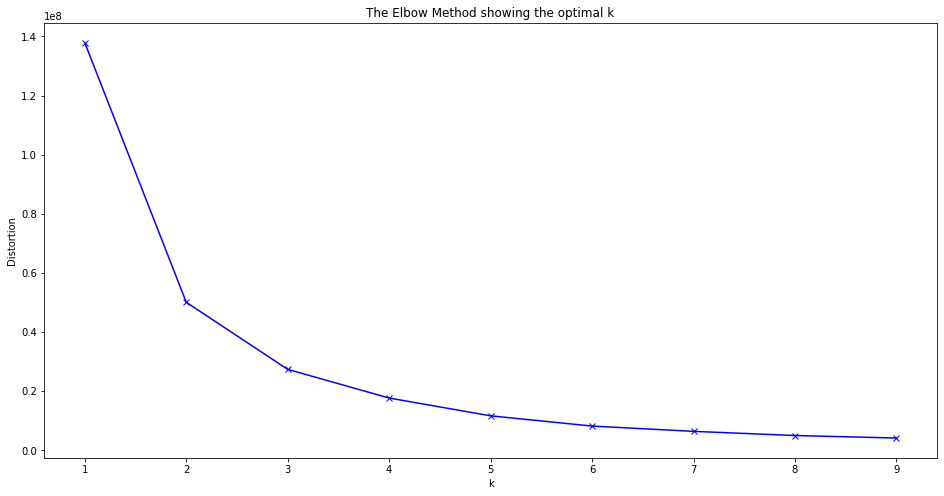

In [95]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [96]:
# run kmeans 3 times 
kms = KMeans(n_clusters=3)
kms.fit(newdf)
kms.labels_ # labeling them
predictions = kms.predict(newdf) #predicting the cluster for all rows

In [97]:
# labeling the rows of dataset and add column 'cluster' in the dataset
newdf['cluster']=kms.labels_
newdf

,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,cluster
0,2,1,0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,2,1,0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,1,2,0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,2,2,0,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,1,2,1,0.0,60,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496286,2,1,0,1.0,77,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
496287,2,2,0,1.0,63,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2
496288,1,1,0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
496289,1,1,0,0.0,45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## In above dataframe we can see cluster from 0 to 2 had been assigned to each row. 

In [98]:
# 3 clusters for the datatset 
cluster0=newdf.loc[newdf['cluster']==0]
cluster1=newdf.loc[newdf['cluster']==1]
cluster2=newdf.loc[newdf['cluster']==2]

In [99]:
#checking cluster0 for results 
cluster0.describe()

,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,cluster
count,212561.000000,212561.000000,212561.000000,212561.000000,212561.000000,212561.000000,212561.000000,212561.000000,212561.000000,212561.000000,212561.000000,212561.000000,212561.000000,212561.000000,212561.000000,212561.000000,212561.0
mean,1.502350,1.192288,0.052931,0.145925,46.120220,0.132235,0.009244,0.032047,0.014349,0.166493,0.029022,0.016908,0.197793,0.016607,0.083416,0.463039,0.0
std,0.499996,0.394099,0.223896,0.353032,5.898033,0.338747,0.095703,0.176126,0.118924,0.372524,0.167869,0.128927,0.398336,0.127794,0.276511,0.498633,0.0
min,1.000000,1.000000,0.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,2.000000,1.000000,0.000000,0.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2.000000,1.000000,0.000000,0.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,2.000000,2.000000,1.000000,1.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [100]:
#checking cluster1 for results 
cluster1.describe()

,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,cluster
count,194165.000000,194165.000000,194165.000000,194165.000000,194165.000000,194165.000000,194165.000000,194165.000000,194165.000000,194165.000000,194165.000000,194165.000000,194165.000000,194165.000000,194165.000000,194165.000000,194165.0
mean,1.487487,1.099652,0.010337,0.067226,26.710798,0.019710,0.002235,0.037267,0.012350,0.031839,0.024793,0.008472,0.118523,0.008920,0.087420,0.358020,1.0
std,0.499845,0.299537,0.101142,0.250414,8.074966,0.139002,0.047225,0.189416,0.110444,0.175571,0.155495,0.091654,0.323227,0.094025,0.282451,0.479419,0.0
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.000000,1.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1.000000,1.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,2.000000,1.000000,0.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,2.000000,2.000000,1.000000,1.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [101]:
#checking cluster2 for results 
cluster2.describe()

,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,cluster
count,89565.000000,89565.000000,89565.000000,89565.000000,89565.000000,89565.000000,89565.000000,89565.000000,89565.00000,89565.000000,89565.000000,89565.000000,89565.000000,89565.000000,89565.000000,89565.000000,89565.0
mean,1.554580,1.511997,0.226819,0.373315,68.208921,0.334383,0.064791,0.023313,0.02837,0.437961,0.048066,0.067716,0.182002,0.052152,0.089254,0.569006,2.0
std,0.497015,0.499859,0.418777,0.483688,8.649547,0.471777,0.246158,0.150895,0.16603,0.496139,0.213906,0.251260,0.385848,0.222335,0.285111,0.495218,0.0
min,1.000000,1.000000,0.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,1.000000,1.000000,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,2.000000,2.000000,0.000000,0.000000,66.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0
75%,2.000000,2.000000,0.000000,1.000000,73.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0
max,2.000000,2.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


##### After comparing 0 to 2 clusters (three clusters) it's very easy to study that cluster 1 gives the better results where we got our class attribute(date_died) mean value 21%(0.211517) and cluster 0 and cluster 2 got mean value 1% (0.010043) and 4% (0.046129) respectively.

### Ploting a actual cluster and predicted cluster

In [118]:
new2df=pd.read_csv('/content/Mydrive/My Drive/new_results.csv')


Text(0.5, 1.0, 'K_Means')

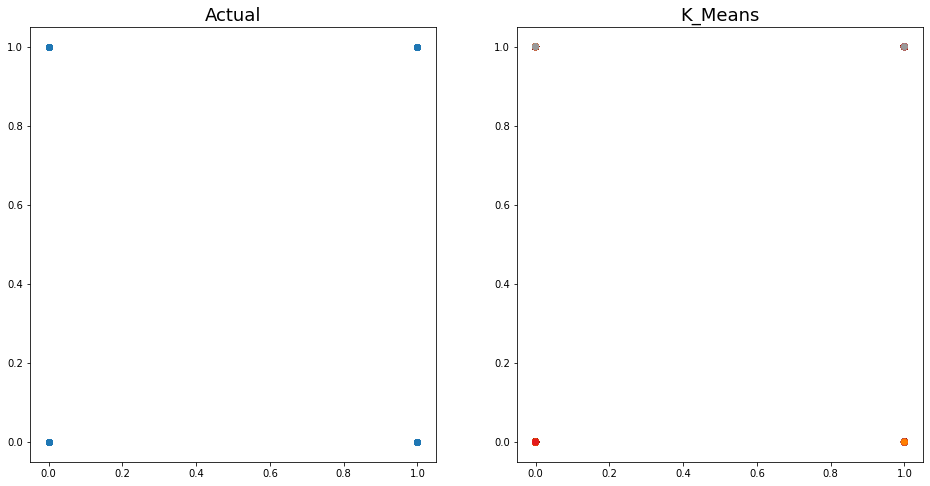

In [119]:
new2df['k_means']=kms.predict(new2df)
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(new2df['date_died'], new2df['pneumonia'])
axes[1].scatter(new2df['date_died'], new2df['pneumonia'], c=new2df['k_means'], cmap=plt.cm.Set1)


axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)